In [51]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\bestsellers with categories.csv")


In [39]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Seaborn verion', sns.__version__)
sns.set_style('whitegrid')

# text data
import string
import re
df = pd.read_csv(r"C:\Users\DELL\Downloads\bestsellers with categories.csv")

Seaborn verion 0.13.2


In [41]:
df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
df[df.Author == 'J. K. Rowling']
df[df.Author == 'J.K. Rowling']
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" ")) # subtract whitespaces
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

# apply function
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\1094739433.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


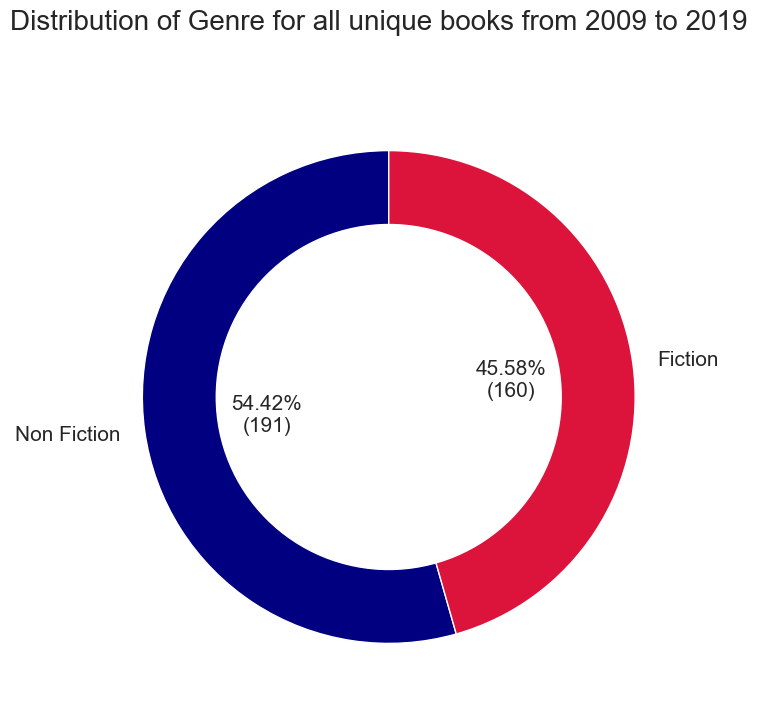

In [43]:
no_dup = df.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']
#genre_col = ['khaki','plum']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\413210449.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


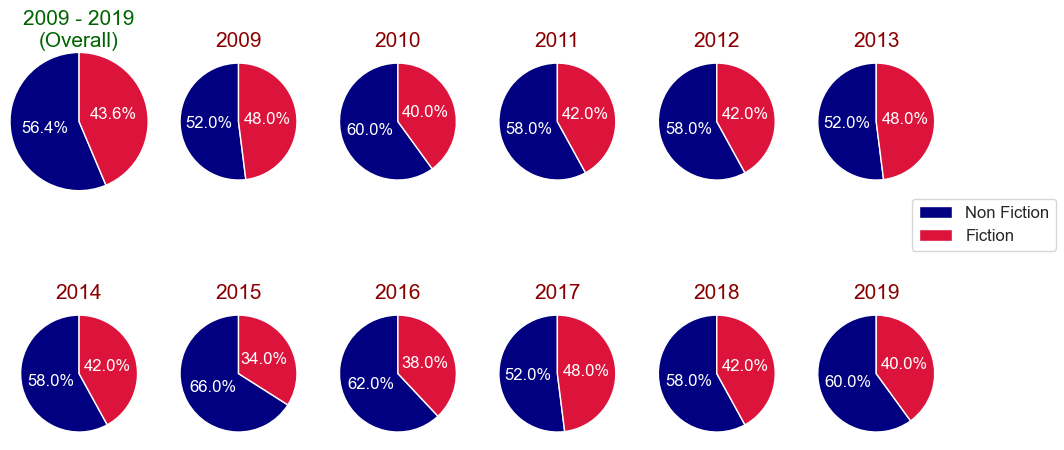

In [45]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = df['Genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

#plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019',
             #fontsize=25)
fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\2335528297.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\2335528297.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')


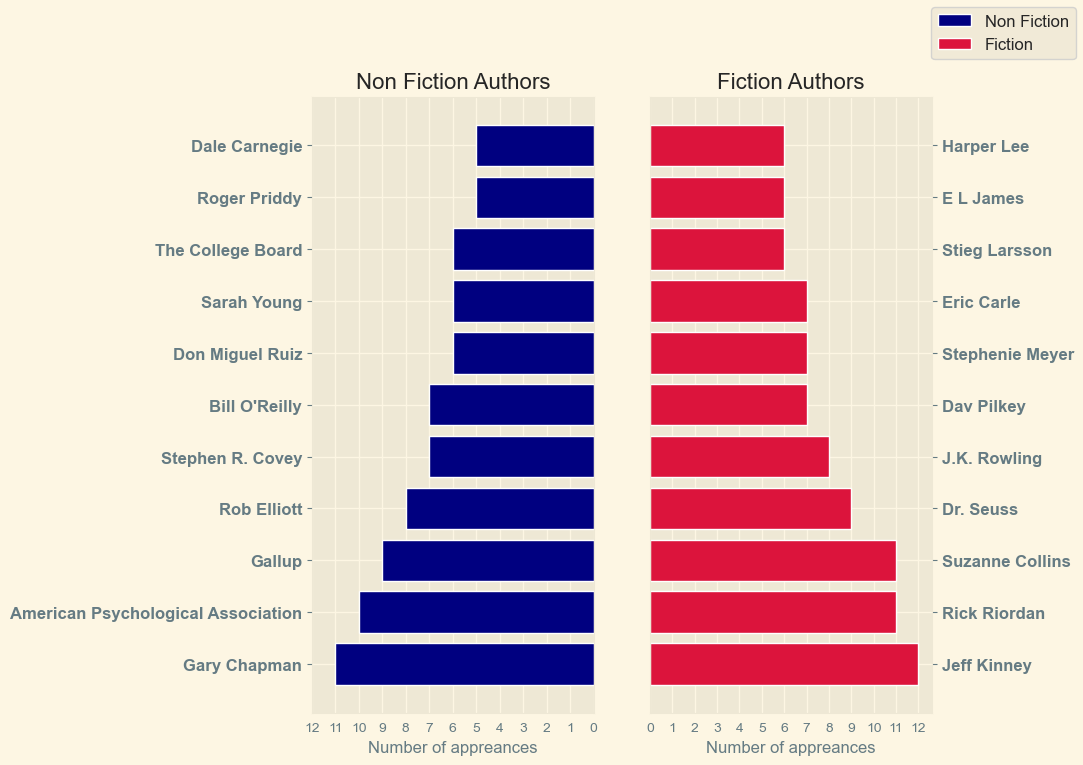

In [47]:
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))
    
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
    
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\1934722200.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(top_authors.index, fontweight='semibold')


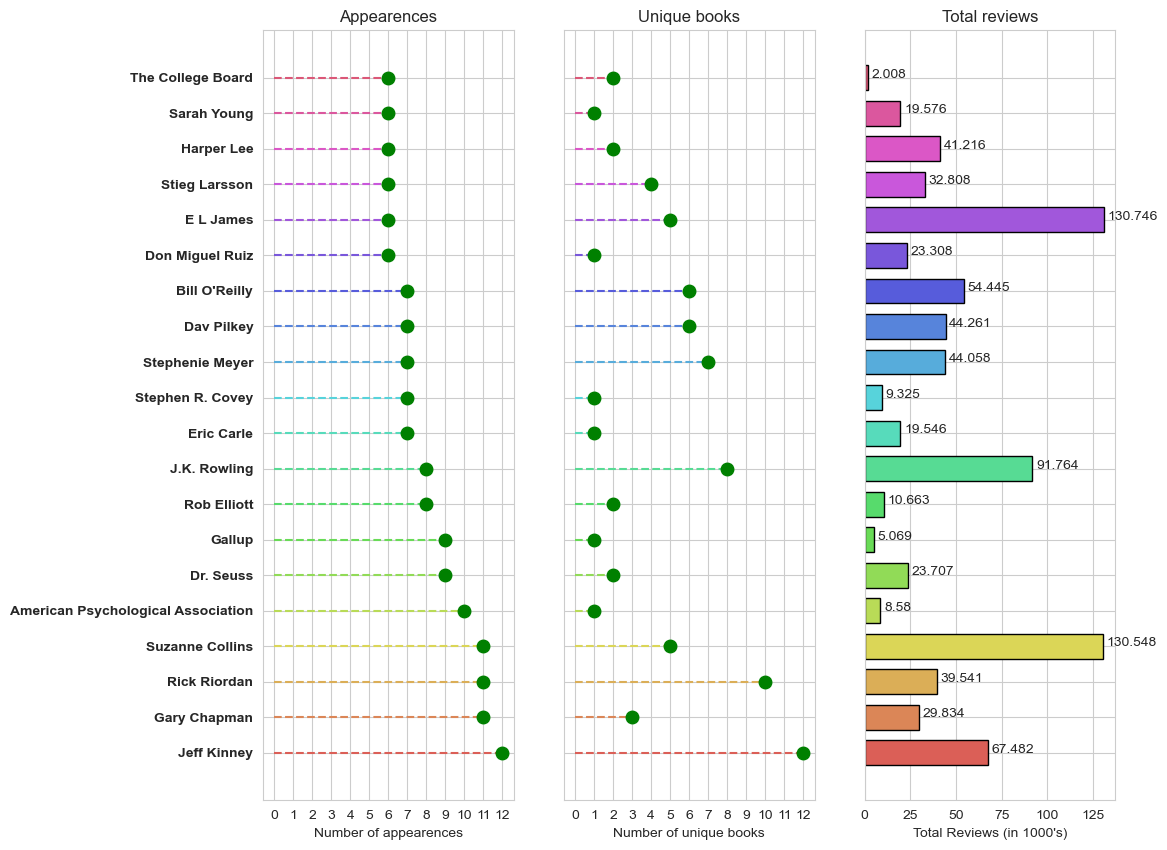

In [49]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

#plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()

In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [57]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [59]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [61]:
df.shape

(550, 7)

There are total of 550 books listed as bestsellers on amazon

Now let's take a look at the variables
Categorical variables: - Genre - Year
Numerical variables: - Reviews - User Rating - Price

 ## Categorical variables

In [65]:
df.Genre.value_counts()

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

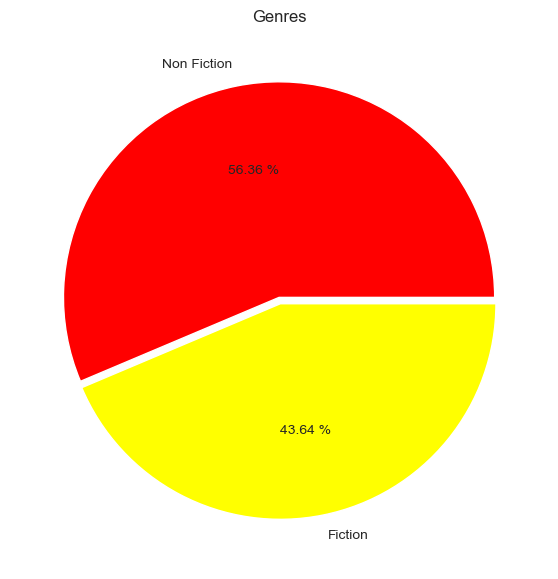

In [67]:
labels = list(df.Genre.value_counts().to_dict().keys())
non_fiction = list(df.Genre.value_counts().to_dict().values())[0]
fiction = list(df.Genre.value_counts().to_dict().values())[1]

plt.figure(figsize=(7,7))
plt.title("Genres")
explode = [0.01, 0.02]
colors = ['red', 'yellow']

plt.pie([non_fiction, fiction], 
        labels = labels, 
        autopct = '%.2f %%',
        explode = explode, 
        colors = colors);

## Non-Fiction books are more in number than the fiction books

## year

df.Year.value_counts()

In [79]:
df.Year.value_counts()


Year
2016    50
2011    50
2018    50
2017    50
2019    50
2014    50
2010    50
2009    50
2015    50
2013    50
2012    50
Name: count, dtype: int64

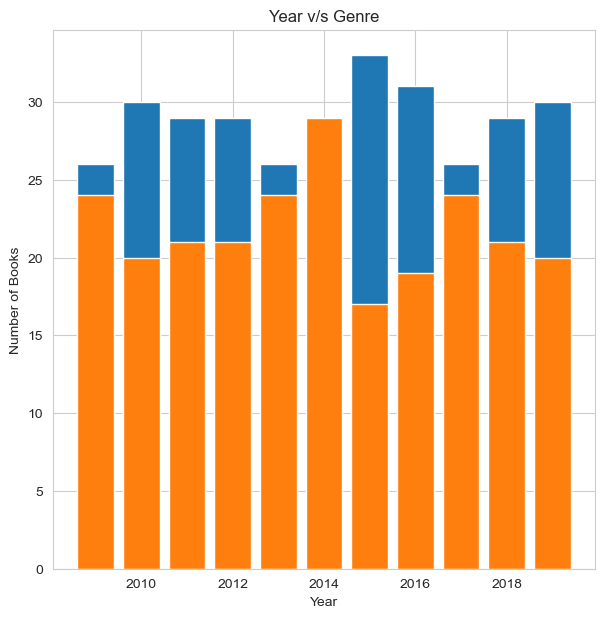

In [81]:
plt.figure(figsize=(7,7))
plt.title('Year v/s Genre')


plt.bar(df[df['Genre']== 'Non Fiction'].Year.value_counts().to_dict().keys(),
        df[df['Genre']== 'Non Fiction'].Year.value_counts().to_dict().values());


plt.bar(df[df['Genre']== 'Fiction'].Year.value_counts().to_dict().keys(),
        df[df['Genre']== 'Fiction'].Year.value_counts().to_dict().values());

plt.xlabel('Year')
plt.ylabel("Number of Books");

## Every year, more non-fiction books became bessellers than the fiction books; except in the year 2014, when more number of fiction books (29) became bestsellers than the non-fiction books (21)

## Numerical variables

## Reviews

In [86]:
df[['Name', 'Genre', 'Reviews']]

,Name,Genre,Reviews
0,10-Day Green Smoothie Cleanse,Non Fiction,17350
1,11/22/63: A Novel,Fiction,2052
2,12 Rules for Life: An Antidote to Chaos,Non Fiction,18979
3,1984 (Signet Classics),Fiction,21424
4,"5,000 Awesome Facts (About Everything!) (Natio...",Non Fiction,7665
...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Fiction,9413
546,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,14331
547,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,14331
548,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,14331


C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\2517978346.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Genre',


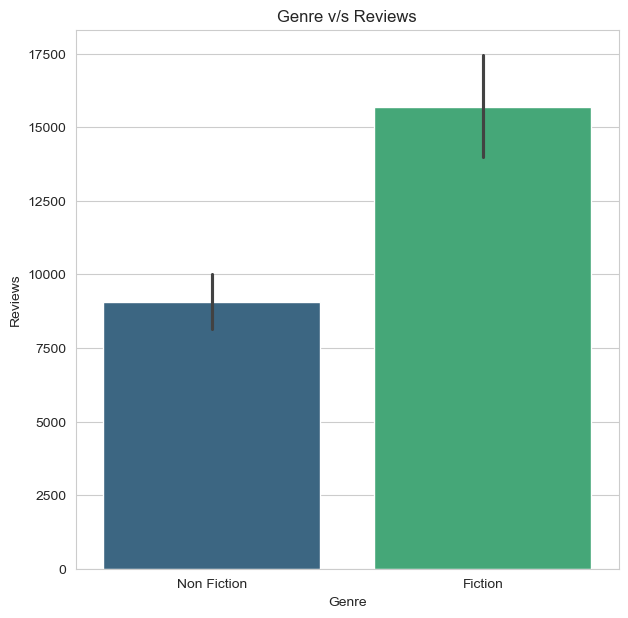

In [88]:
plt.figure(figsize=(7,7))
plt.title("Genre v/s Reviews")
sns.barplot(x = 'Genre',
            y = 'Reviews',
            palette = "viridis",
            data = df);

# Fiction books have more reviews than the Non-Fiction books

## User Rating

In [92]:
df[['Name', 'Genre', 'Price', 'User Rating']]

,Name,Genre,Price,User Rating
0,10-Day Green Smoothie Cleanse,Non Fiction,8,4.7
1,11/22/63: A Novel,Fiction,22,4.6
2,12 Rules for Life: An Antidote to Chaos,Non Fiction,15,4.7
3,1984 (Signet Classics),Fiction,6,4.7
4,"5,000 Awesome Facts (About Everything!) (Natio...",Non Fiction,12,4.8
...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Fiction,8,4.9
546,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,8,4.7
547,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,8,4.7
548,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,8,4.7


C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\2854370656.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= list(df.Genre.value_counts().to_dict().keys()),


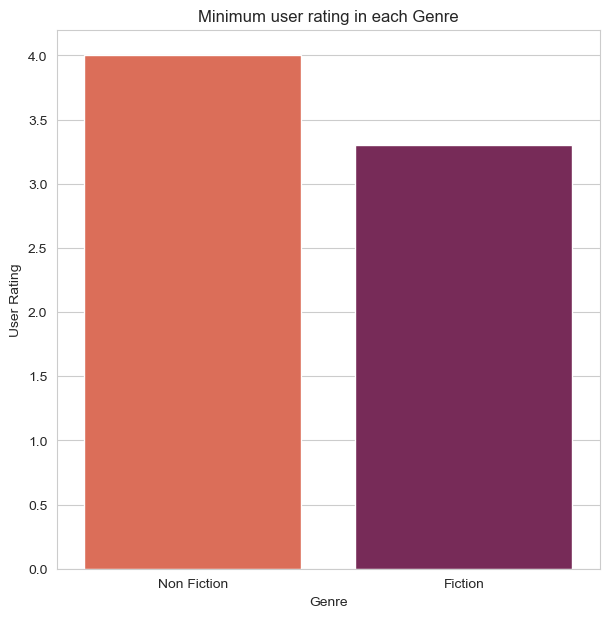

In [94]:
nf = df[df['Genre']== 'Non Fiction']['User Rating'].min()
f = df[df['Genre']== 'Fiction']['User Rating'].min()

plt.figure(figsize=(7,7))
plt.title("Minimum user rating in each Genre")
plt.xlabel('Genre')
plt.ylabel('User Rating')
sns.barplot(x= list(df.Genre.value_counts().to_dict().keys()), 
            y = [nf,f],
            palette = 'rocket_r');

## The minimum user rating in fiction genre is 3.3 whereas it is 4.0 in non-fiction genre

## Price

In [102]:
df[['Name', 'Price', 'User Rating', 'Reviews','Genre']]

,Name,Price,User Rating,Reviews,Genre
0,10-Day Green Smoothie Cleanse,8,4.7,17350,Non Fiction
1,11/22/63: A Novel,22,4.6,2052,Fiction
2,12 Rules for Life: An Antidote to Chaos,15,4.7,18979,Non Fiction
3,1984 (Signet Classics),6,4.7,21424,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",12,4.8,7665,Non Fiction
...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),8,4.9,9413,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,8,4.7,14331,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,8,4.7,14331,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,8,4.7,14331,Non Fiction


## Non fiction books are high-priced than the fiction books

# Deriving insights
## Top 5 Authors with most number of books in each genre

In [106]:
fiction_df = df[df['Genre']== 'Fiction']
fiction_df.Author.value_counts()[:5]

Author
Jeff Kinney        12
Suzanne Collins    11
Rick Riordan       11
Dr. Seuss           9
Stephenie Meyer     7
Name: count, dtype: int64

In [108]:
non_fiction_df = df[df['Genre']== 'Non Fiction']
non_fiction_df.Author.value_counts()[:5]

Author
Gary Chapman                          11
American Psychological Association    10
Gallup                                 9
Rob Elliott                            8
Bill O'Reilly                          7
Name: count, dtype: int64

## Genre with the highest user ratings

In [111]:
df1 = df.sort_values("User Rating", ascending = False)[df['User Rating'] == 4.9]
df1.Genre.value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\684504074.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df.sort_values("User Rating", ascending = False)[df['User Rating'] == 4.9]


Genre
Fiction        41
Non Fiction    11
Name: count, dtype: int64

## Year v/s Reviews

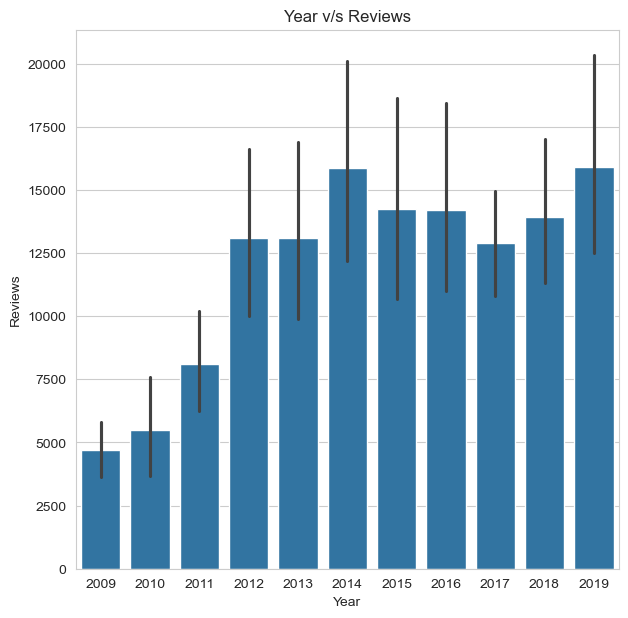

In [114]:
plt.figure(figsize=(7,7))
plt.title("Year v/s Reviews")

sns.barplot(x = 'Year',
            y = 'Reviews',
            data = df);

## Books released in the year 2014 and 2019 got more reviews than the books released in other years

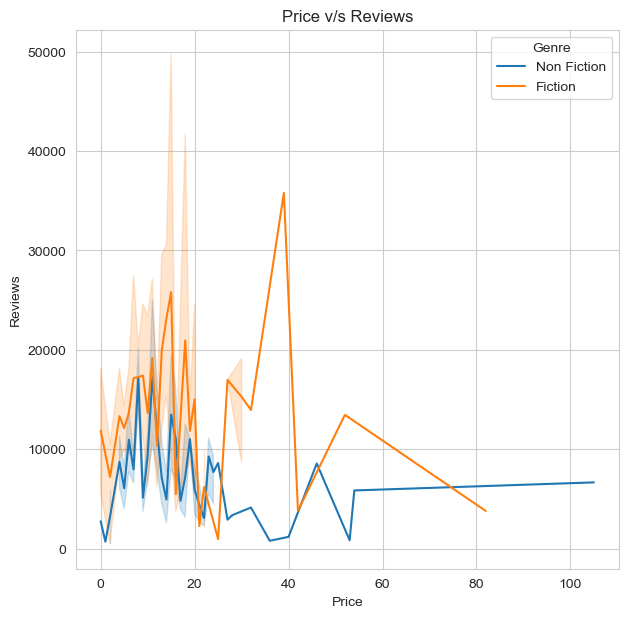

In [117]:
plt.figure(figsize=(7,7))

plt.title("Price v/s Reviews")
sns.lineplot(x = 'Price', 
             y = 'Reviews', 
             hue = 'Genre',
             data = df);

## Fiction book have more reviews than the non-fiction book but non-fiction books have higher prices



## Price Distribution

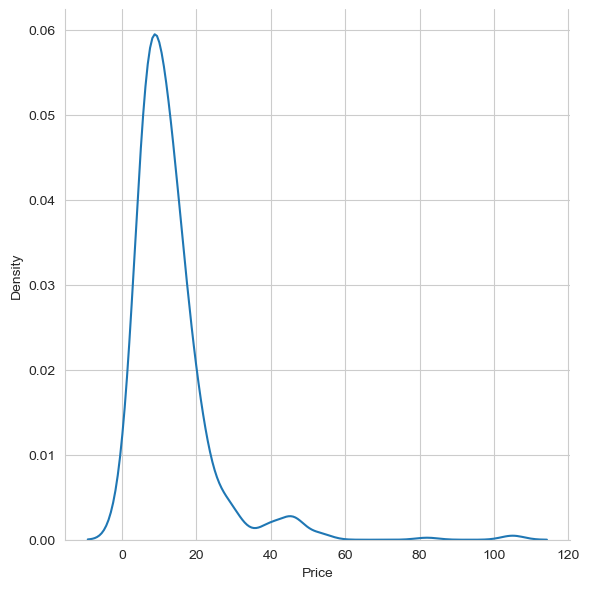

In [121]:
sns.displot(df['Price'], 
            kind ='kde',
            height = 6);

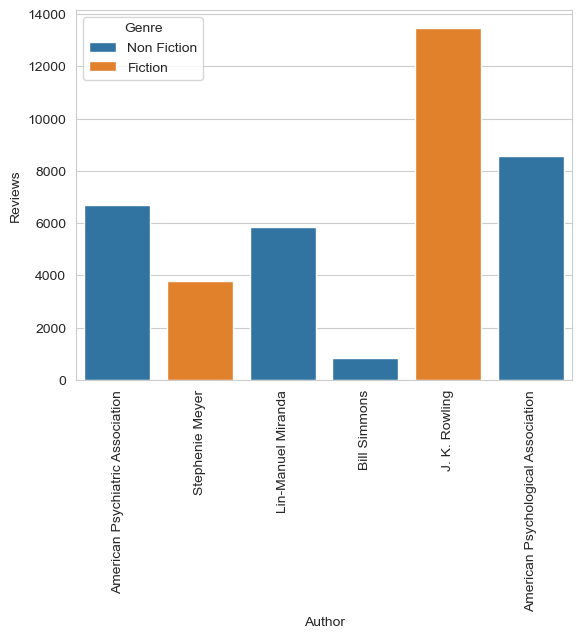

In [123]:
df_price = df.sort_values("Price", ascending= False)[['Author', 'Price', 'Genre', 'Reviews']].head(10)

plt.xticks(rotation = 90)
sns.barplot(x = 'Author', 
            y = 'Reviews', 
            data = df_price, hue = "Genre");


## Among the authors with high-priced books, J.K. Rowling has the most number of reviews

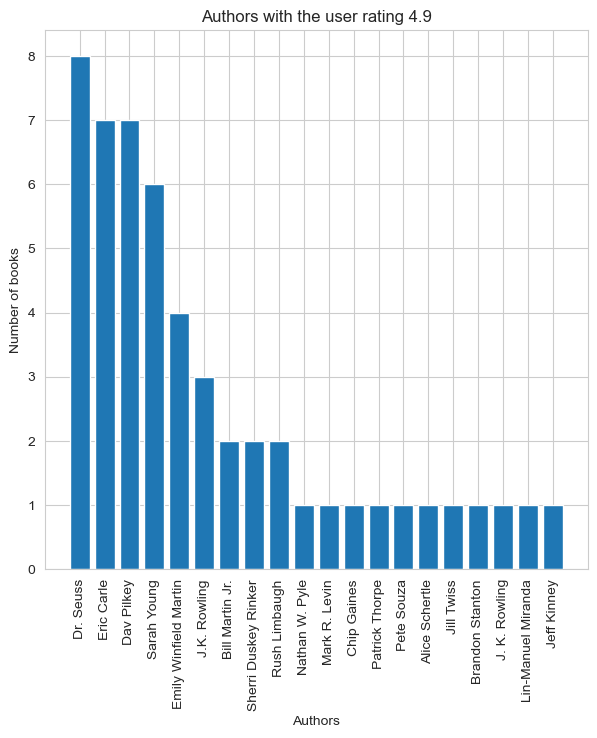

In [126]:
df_ur = df[df['User Rating']== 4.9][['Author', 'Genre']]


plt.figure(figsize=(7,7))
plt.title("Authors with the user rating 4.9")
plt.bar( df_ur.Author.value_counts().to_dict().keys(),
         df_ur.Author.value_counts().to_dict().values())
plt.xlabel("Authors")
plt.xticks(rotation = 90)
plt.ylabel("Number of books");

## Dr. Seuss has most number of books (8) with the user rating 4.9